In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)

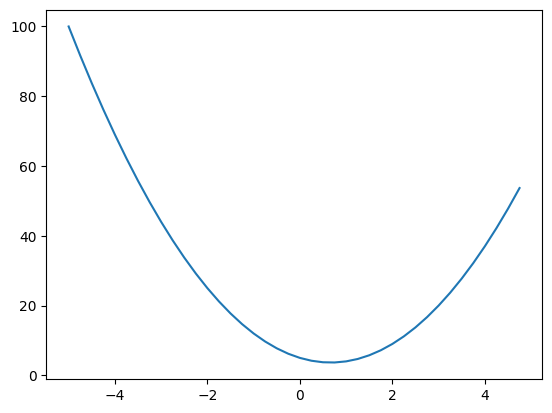

In [6]:
plt.plot(xs, ys)

In [7]:
# Derivative
h = 0.0001
x = 3.0
# rise over run
(f(x+h) - f(x))/h

14.000300000063248

In [8]:
# Derivative zero
h = 0.0001
x = 2/3
# rise over run
(f(x+h) - f(x))/h

0.0002999999981767587

In [9]:
a = 2.0
b = -3.0
c = 10.0
d = (a*b)+c
print(d)

4.0


In [10]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = (a*b)+c
a+=h

d2 = (a*b)+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [11]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = (a*b)+c
b+=h

d2 = (a*b)+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [12]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = (a*b)+c
c+=h

d2 = (a*b)+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [13]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b
d.label = 'd'
e = d+c
e.label= 'e'
f = Value(-2.0, label='f')
L = e * f
L.label = 'L'
L._prev, L._op

({Value(data = -2.0), Value(data = 4.0)}, '*')

In [14]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr = {'rankdir':'LR'})
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid+n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

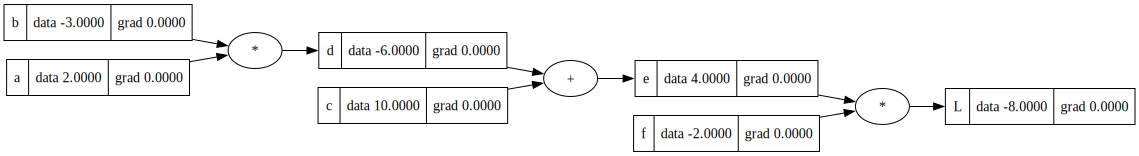

In [15]:
draw_dot(L)

In [16]:
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a*b
    d.label = 'd'
    e = d+c
    e.label= 'e'
    f = Value(-2.0, label='f')
    L = e * f
    L.label = 'L'

    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a*b
    d.label = 'd'
    e = d+c
    e.label= 'e'
    f = Value(-2.0, label='f')
    L = e * f
    L.label = 'L'
    L2=L.data+h

    print((L2-L1)/h)

lol()

    

1.000000000000334


Chain rule states that , knowing the instantaneous rate of z with respect to y and instantaneous rate of y with respect to x, allows us to calculate the instantaneous rate of z with respect to x as the product of two.



simple Intuition : 



If a car travels twice as fast as bicycle and a bicycle travels four times as fast as a man , then 2*4 = 8 , a car travels 8 times as fast as a man. 

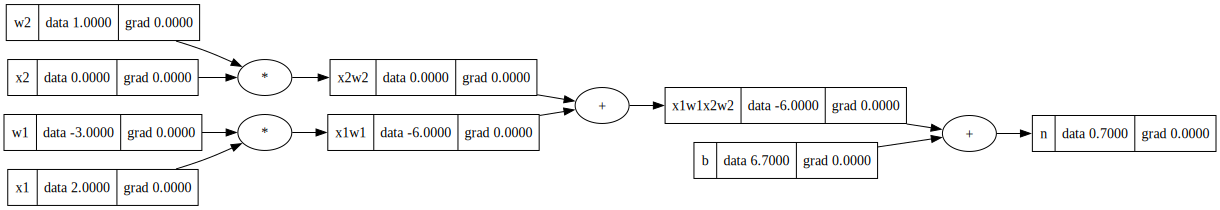

In [17]:
# One Single Neuron

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.7, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'

draw_dot(n)

In [18]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ) , 'tanh')
        return out

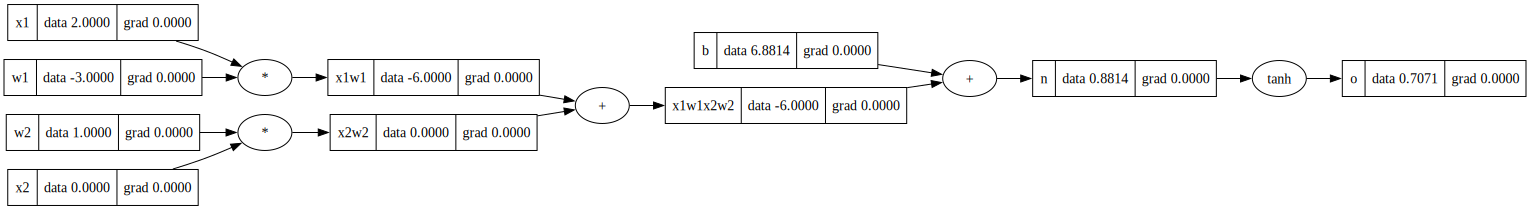

In [19]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'
o = n.tanh();o.label='o'

draw_dot(o)

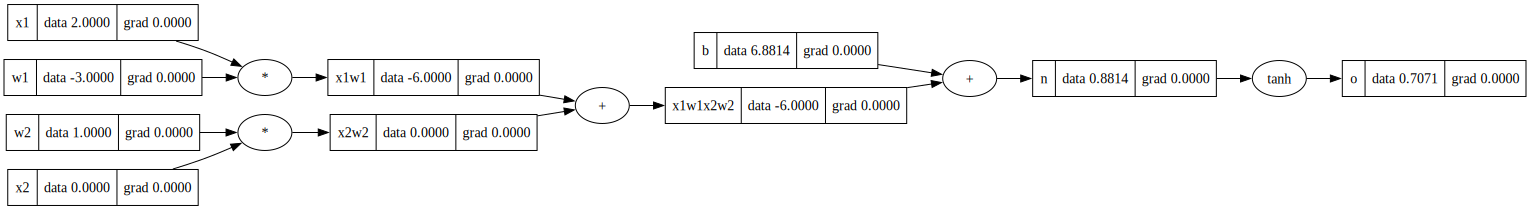

In [20]:
draw_dot(o)

In [21]:
x1.grad = w1.data*x1w1.grad
w1.grad = x1.data*x1w1.grad

In [22]:
x2.grad = w2.data*x2w2.grad
w2.grad = x2.data*x2w2.grad

In [23]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [24]:
x1w1x2w2.grad = 0.5
b.grad = 0.5


In [25]:
n.grad = 1-o.data**2 #(1-tanh**2) is the derivate of tanh

In [26]:
o.grad = 1.0

In [27]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ) , 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out 

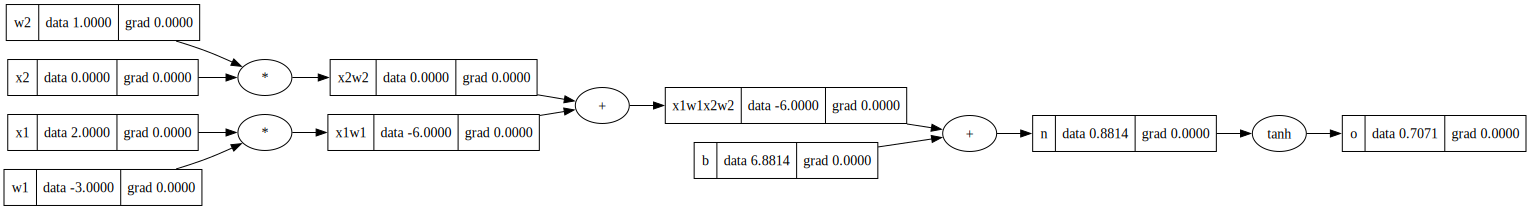

In [28]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'
o = n.tanh();o.label='o'

draw_dot(o)

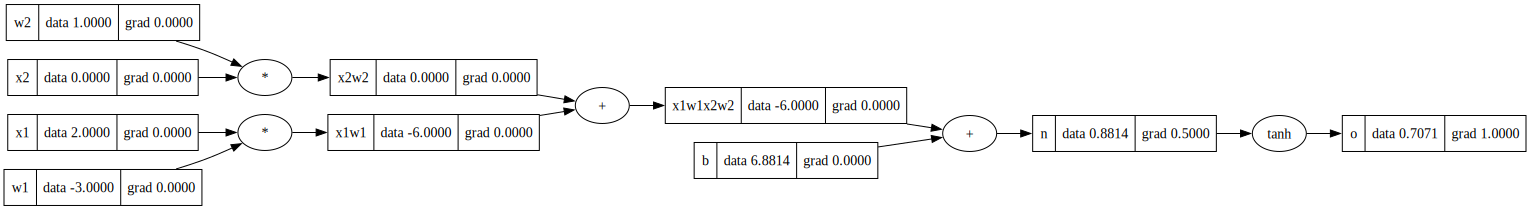

In [29]:
o.grad = 1.0
o._backward()
draw_dot(o)

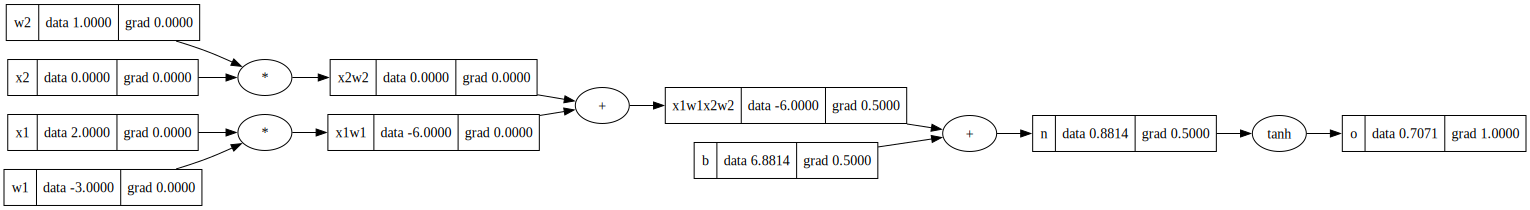

In [30]:
n._backward()
draw_dot(o)

In [31]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            topo.append(child)
            build_topo(child)
        topo.append(v)
build_topo(o)

In [32]:
topo

[Value(data = 0.8813735870195432),
 Value(data = -6.0),
 Value(data = 0.0),
 Value(data = 1.0),
 Value(data = 1.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = 0.0),
 Value(data = -6.0),
 Value(data = 2.0),
 Value(data = 2.0),
 Value(data = -3.0),
 Value(data = -3.0),
 Value(data = -6.0),
 Value(data = -6.0),
 Value(data = 6.881373587019543),
 Value(data = 6.881373587019543),
 Value(data = 0.8813735870195432),
 Value(data = 0.7071067811865476)]

In [62]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ) , 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out 
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        self.grad = 1.0
        build_topo(self)
        for node in reversed(topo):
            node._backward()
        
        

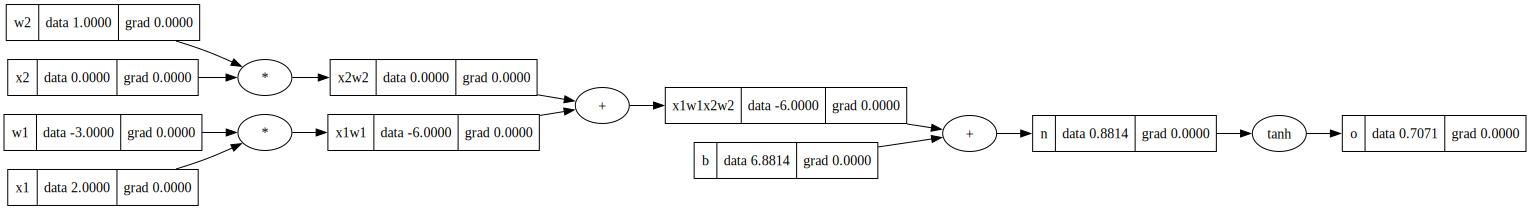

In [63]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'
o = n.tanh();o.label='o'

draw_dot(o)

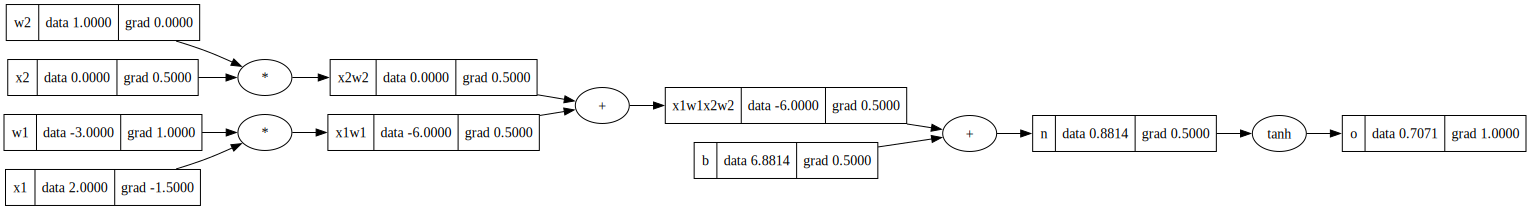

In [64]:
o.backward()
draw_dot(o)

In [65]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad+= 1.0 * out.grad
            other.grad+= 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad+= other.data * out.grad
            other.grad+= self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ) , 'tanh')
        def _backward():
            self.grad+= (1 - t**2) * out.grad
        out._backward = _backward
        return out 
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        self.grad = 1.0
        build_topo(self)
        for node in reversed(topo):
            node._backward()
        
        

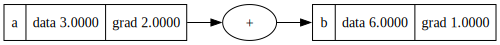

In [66]:
# bug

a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

In [67]:
Value(1.0) + 1

AttributeError: 'int' object has no attribute 'data'

In [85]:
class Value:
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data = {self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad+= 1.0 * out.grad
            other.grad+= 1.0 * out.grad
        out._backward = _backward
        return out

    def __sub__(self, other):
        return self + (-other)

    def __neg__(self):
        return -1 * self
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad+= other.data * out.grad
            other.grad+= self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other
    
    def __radd__(self, other):
        return self + other

    def __truediv__(self, other):
        return self * other**-1


    def __pow__(self,other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')
        def _backward():
            self.grad += other * self.data**(other-1) * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t, (self, ) , 'tanh')
        def _backward():
            self.grad+= (1 - t**2) * out.grad
        out._backward = _backward
        return out 

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ) , 'exp')
        def _backward():
            self.grad+= out.data * out.grad
        out._backward = _backward
        return out 
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        self.grad = 1.0
        build_topo(self)
        for node in reversed(topo):
            node._backward()

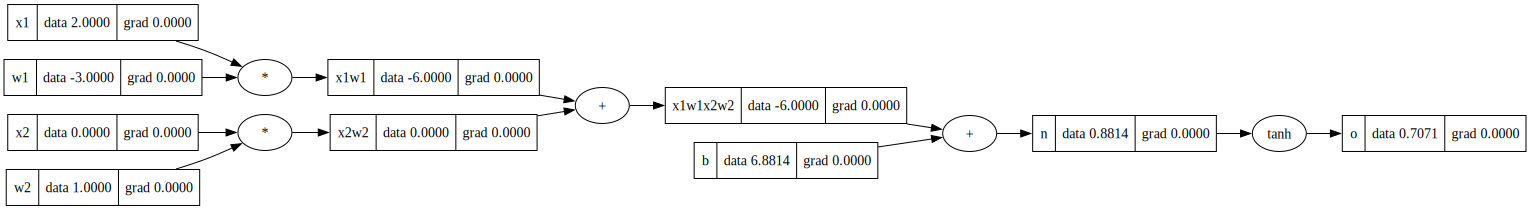

In [86]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'
o = n.tanh();o.label='o'

draw_dot(o)

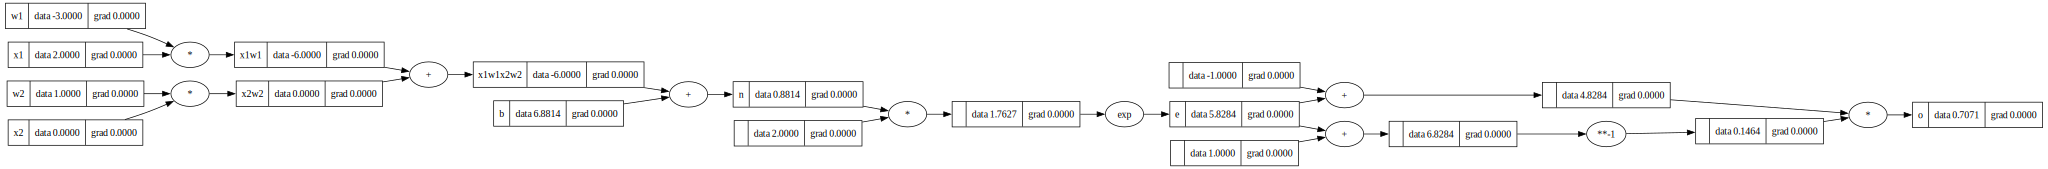

In [89]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1 ; x1w1.label='x1w1'
x2w2 = x2*w2 ; x2w2.label='x2w2'
x1w1x2w2 = x1w1+x2w2 ; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b ; n.label ='n'
e = (2*n).exp() ; e.label='e'
o = (e-1)/(e+1);o.label='o'
draw_dot(o) 

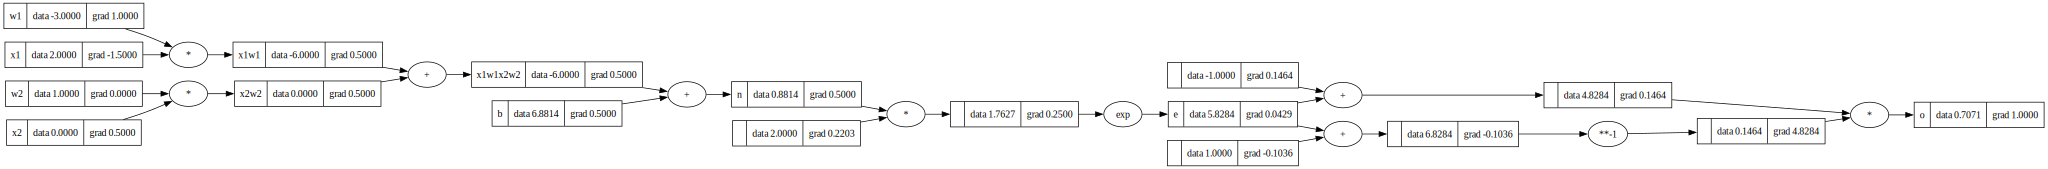

In [90]:
o.backward()
draw_dot(o)

In [95]:
# same thing in pytorch

import torch
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad=True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad=True
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad=True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad=True

b = torch.Tensor([6.8813735870195432]).double()
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('----------')
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())


0.7071066904050358
----------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [122]:
# Now lets implement a neuron
import random
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    def __call__(self, x):
        # w*x + b
        act = sum((wi*xi for wi, xi  in zip(self.w , x)), self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]

# Now lets implement a layer

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs)==1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [123]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = 0.15671279945569963)

In [124]:
n.parameters()

[Value(data = 0.8985117618968947),
 Value(data = 0.13303930856446566),
 Value(data = 0.5689614970091972),
 Value(data = 0.26103985327197554),
 Value(data = -0.7589555092235025),
 Value(data = 0.16535752137943494),
 Value(data = 0.9877538751015631),
 Value(data = -0.49261299676442905),
 Value(data = 0.30730983106391796),
 Value(data = -0.6877560926336359),
 Value(data = 0.9010801645501609),
 Value(data = 0.36830430989738816),
 Value(data = 0.4759970431513092),
 Value(data = 0.5813159923805384),
 Value(data = 0.3186916027825235),
 Value(data = -0.9813402730051077),
 Value(data = -0.4254166497741345),
 Value(data = -0.6522664289894404),
 Value(data = 0.32099326917515336),
 Value(data = -0.09824747034772296),
 Value(data = 0.123921535594258),
 Value(data = -0.9263011981520057),
 Value(data = 0.2877481891033309),
 Value(data = -0.2409115742449417),
 Value(data = 0.15954258681071098),
 Value(data = -0.384628334624441),
 Value(data = 0.580296970693279),
 Value(data = 0.5904340951083507),
 Val

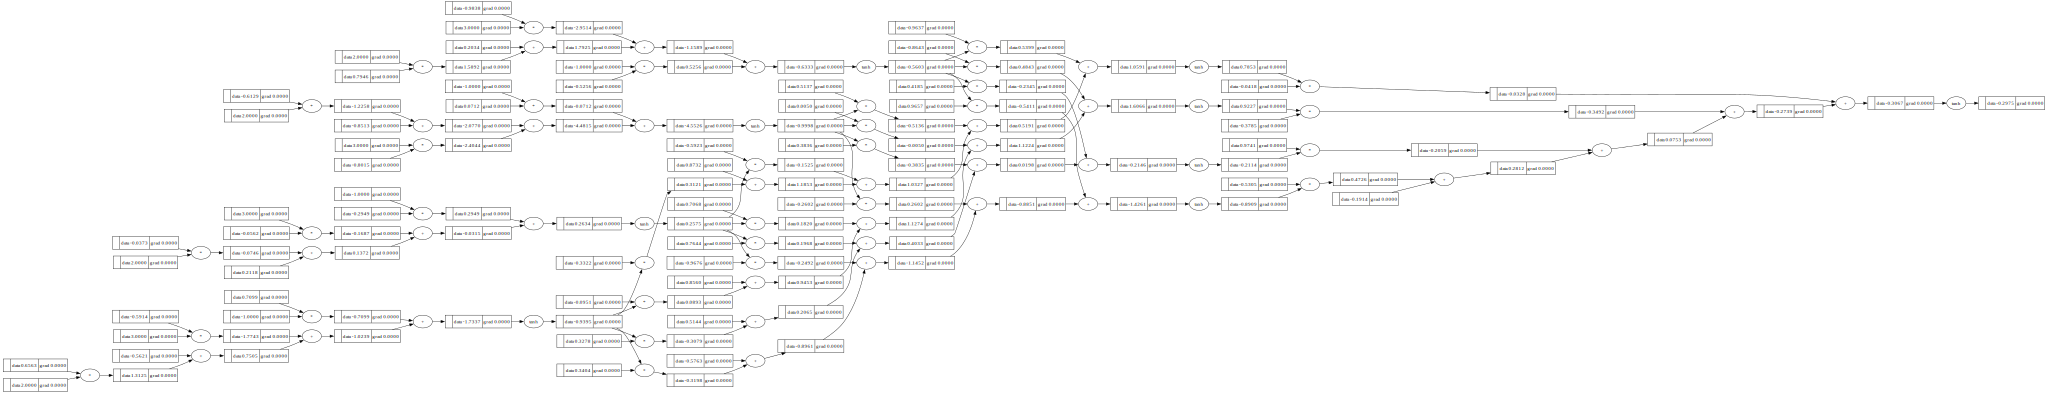

In [114]:
draw_dot(n(x))

In [182]:
n = MLP(3, [4, 4, 1])
xs = [[2.0, 3.0, -1.0],
      [3.0, -1.0, 0.5],
      [0.5, 1.0, 1.0],
      [1.0, 1.0, -1.0]]
ys = [1.0, -1.0, -1.0, 1.0]

In [183]:
# Dont forget to flush the gradients
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum((yout-ygt)**2 for yout,ygt in zip(ypred,ys))
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    for p in n.parameters():
        p.data += -0.01 * p.grad
    print(k, loss)

0 Value(data = 7.324141425825535)
1 Value(data = 6.430340742609869)
2 Value(data = 5.60806247789718)
3 Value(data = 4.8531845876195465)
4 Value(data = 4.161798289290381)
5 Value(data = 3.5383536920558853)
6 Value(data = 2.989415276855702)
7 Value(data = 2.516781528621963)
8 Value(data = 2.116593226593708)
9 Value(data = 1.7818287419775878)
10 Value(data = 1.5044416813012884)
11 Value(data = 1.276310371824991)
12 Value(data = 1.0896279525755588)
13 Value(data = 0.9371833954946647)
14 Value(data = 0.8125920061099586)
15 Value(data = 0.710419679304612)
16 Value(data = 0.6261866205552393)
17 Value(data = 0.5562834705049526)
18 Value(data = 0.49784462556863396)
19 Value(data = 0.4486132086454596)


In [181]:
ys, ypred

([1.0, -1.0, -1.0, 1.0],
 [Value(data = 0.9970983477364381),
  Value(data = -0.9998183031865399),
  Value(data = -0.9997244115580453),
  Value(data = 0.998467893582456)])